In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import sklearn
from sklearn import preprocessing

# Question 1: Synthetic Data Generation, Data Preprocessing, Data Visualization

## 1.1. Temporal Sources: Time Courses (TC) Matrix

In [2]:
# Temporal Variables
N = 240

# Spatial Variables
V = 441
x1, x2 = 21, 21

# Number of Sources
NSRCS = 6

In [3]:
# Arrival Vector
AV = [0,20,0,0,0,0]

# Increment Vector
IV = [30,45,60,40,40,40]

# Duration of Ones
duration_of_ones = [15,20,25,15,20,25]

# TC matrix
TC = np.zeros(shape=(N, NSRCS))

for col in range(0,NSRCS):
    for row in range(AV[col],N-20,IV[col]):
        for ones in range(0, duration_of_ones[col]):
            TC[row+ones][col] = 1
            
pd.DataFrame(TC)

,0,1,2,3,4,5
0,1.0,0.0,1.0,1.0,1.0,1.0
1,1.0,0.0,1.0,1.0,1.0,1.0
2,1.0,0.0,1.0,1.0,1.0,1.0
3,1.0,0.0,1.0,1.0,1.0,1.0
4,1.0,0.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...
235,0.0,0.0,0.0,0.0,0.0,0.0
236,0.0,0.0,0.0,0.0,0.0,0.0
237,0.0,0.0,0.0,0.0,0.0,0.0
238,0.0,0.0,0.0,0.0,0.0,0.0


Mean center each TC by subtracting its mean and standardize by dividing it with SD

In [4]:
for col in range(0, NSRCS):
    mean = np.mean(TC[:,col], axis=0)
    sd = np.std(TC[:,col], axis=0)
    
    TC[:,col] = (TC[:,col] - mean) / sd

pd.DataFrame(TC)

,0,1,2,3,4,5
0,1.0,-0.845154,1.183216,1.290994,1.0,0.774597
1,1.0,-0.845154,1.183216,1.290994,1.0,0.774597
2,1.0,-0.845154,1.183216,1.290994,1.0,0.774597
3,1.0,-0.845154,1.183216,1.290994,1.0,0.774597
4,1.0,-0.845154,1.183216,1.290994,1.0,0.774597
...,...,...,...,...,...,...
235,-1.0,-0.845154,-0.845154,-0.774597,-1.0,-1.290994
236,-1.0,-0.845154,-0.845154,-0.774597,-1.0,-1.290994
237,-1.0,-0.845154,-0.845154,-0.774597,-1.0,-1.290994
238,-1.0,-0.845154,-0.845154,-0.774597,-1.0,-1.290994


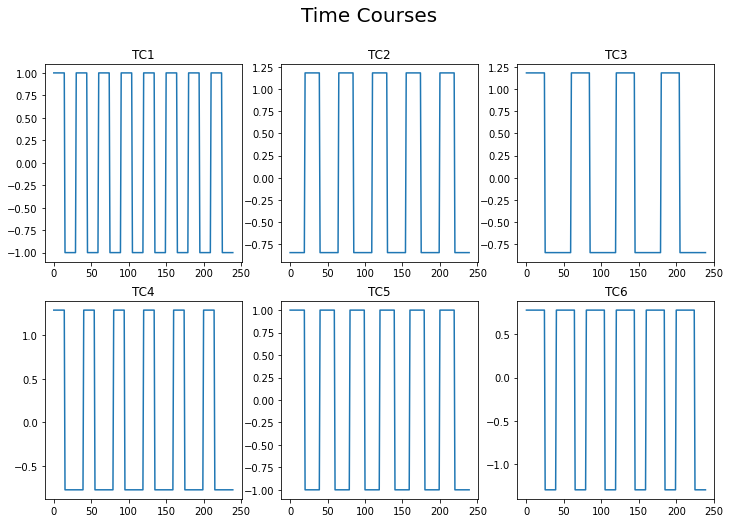

In [5]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12,8))

axs[0,0].plot(range(0,N), TC[:,0])
axs[0,0].set_title("TC1")
axs[0,1].plot(range(0,N), TC[:,1])
axs[0,1].set_title("TC2")
axs[0,2].plot(range(0,N), TC[:,2])
axs[0,2].set_title("TC3")
axs[1,0].plot(range(0,N), TC[:,3])
axs[1,0].set_title("TC4")
axs[1,1].plot(range(0,N), TC[:,4])
axs[1,1].set_title("TC5")
axs[1,2].plot(range(0,N), TC[:,5])
axs[1,2].set_title("TC6")

plt.suptitle("Time Courses", fontsize=20)

plt.savefig("plots/1_1_TC", bbox_inches='tight')

plt.show()

## 1.2. Correlation Matrix between TCs

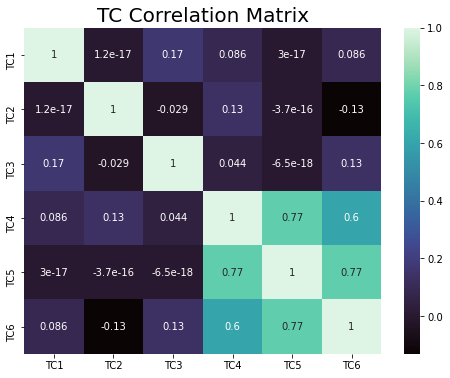

In [6]:
tc_df = pd.DataFrame(TC, columns=["TC1","TC2","TC3","TC4","TC5","TC6"])

plt.figure(figsize=(8, 6))
sns.heatmap(tc_df.corr(), cmap="mako", annot=True)
plt.title("TC Correlation Matrix", fontsize=20)

plt.savefig("plots/1_2_correlationmatrix", bbox_inches='tight')

By observing the correlation matrix (CM), we can see that some TCs are highly correlated. For instance, TC4, TC5, and TC6 somewhat have a positive correlation between each other. For other TCs, we do not really see a significant correlation.

## 1.3. Spatial Sources: Spatial Maps (SM)

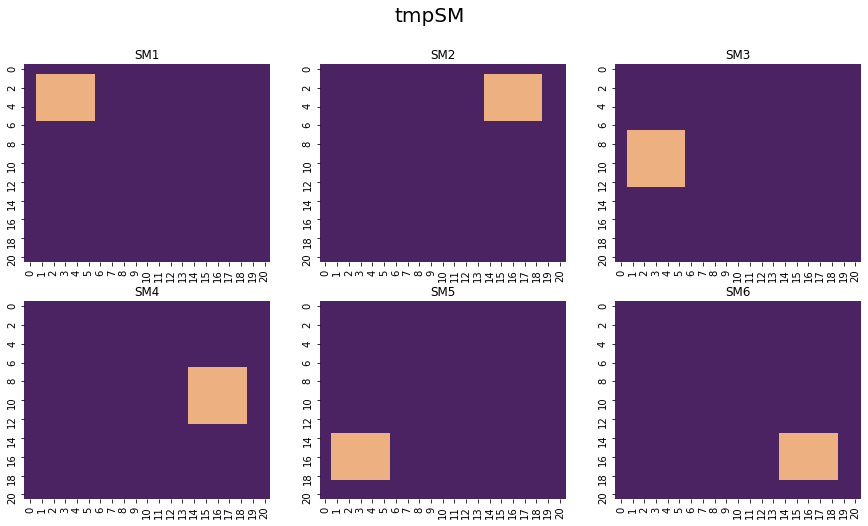

In [7]:
tmpSM = np.zeros(shape=(6,21,21))

# ones (with index correction starts from 0 instead of 1)
ones = [((1,5),(1,5)), ((1,5),(14,18)), ((7,12),(1,5)), ((7,12),(14,18)), ((14,18),(1,5)), ((14,18),(14,18))]

for col in range(0, 6):
    row_i = ones[col][0]
    col_i = ones[col][1]
    tmpSM[col,row_i[0]:row_i[1]+1,col_i[0]:col_i[1]+1] = 1
    
        
fig, axs = plt.subplots(2, 3, figsize=(15,8))
sns.heatmap(tmpSM[0], cmap = "flare_r", ax = axs[0,0], cbar=False)
axs[0,0].set_title("SM1")
sns.heatmap(tmpSM[1], cmap = "flare_r", ax = axs[0,1], cbar=False)
axs[0,1].set_title("SM2")
sns.heatmap(tmpSM[2], cmap = "flare_r", ax = axs[0,2], cbar=False)
axs[0,2].set_title("SM3")
sns.heatmap(tmpSM[3], cmap = "flare_r", ax = axs[1,0], cbar=False)
axs[1,0].set_title("SM4")
sns.heatmap(tmpSM[4], cmap = "flare_r", ax = axs[1,1], cbar=False)
axs[1,1].set_title("SM5")
sns.heatmap(tmpSM[5], cmap = "flare_r", ax = axs[1,2], cbar=False)
axs[1,2].set_title("SM6")

plt.suptitle("tmpSM", fontsize=20)

plt.savefig("plots/1_3_a_SMs", bbox_inches='tight')

plt.show()

In [8]:
# reshape tmpSM to two dimensional

SM = tmpSM.reshape(6,441)

sm_df = pd.DataFrame(SM, index=["SM1", "SM2", "SM3", "SM4", "SM5", "SM6"])

sm_df

,0,1,2,3,4,5,6,7,8,9,...,431,432,433,434,435,436,437,438,439,440
SM1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SM2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SM3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SM4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SM5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SM6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


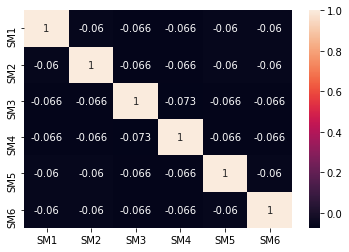

In [9]:
sns.heatmap(sm_df.T.corr(), annot=True)

plt.savefig("plots/1_3_b_SM_corr", bbox_inches="tight")

plt.show()

As seen in the correlation matrix (CM), there are none of the six vectored SMs that have a high correlation between each other. However from this CM we cannot say for sure that it is independent because correlation does not imply independence.


## 1.4.  Noise Generation

In [10]:
# Generate zero mean gaussian noises.
mean = 0

# temporal noise
var_t = 0.25
sd_t = math.sqrt(var_t)
noise_t = np.random.normal(mean, sd_t, size=(240,6))
t_df = pd.DataFrame(noise_t, columns=["1","2","3","4","5","6"])

# spatial noise
var_s = 0.015
sd_s = math.sqrt(var_s)
noise_s = np.random.normal(mean, sd_s, size=(6,441))
s_df = pd.DataFrame(noise_s, index=["1","2","3","4","5","6"])

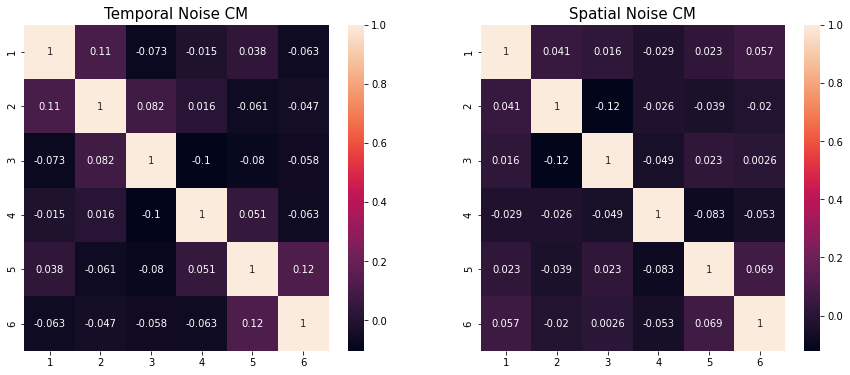

In [11]:
# Check correlation of noise with CM
fig, axs = plt.subplots(1,2, figsize = (15,6))
sns.heatmap(t_df.corr(), annot=True, ax = axs[0])
axs[0].set_title("Temporal Noise CM", fontsize=15)
sns.heatmap(s_df.T.corr(), annot=True, ax = axs[1])
axs[1].set_title("Spatial Noise CM", fontsize=15)

plt.savefig("plots/1_4_temporal_and_spatial_noise_CM", bbox_inches="tight")

plt.show()

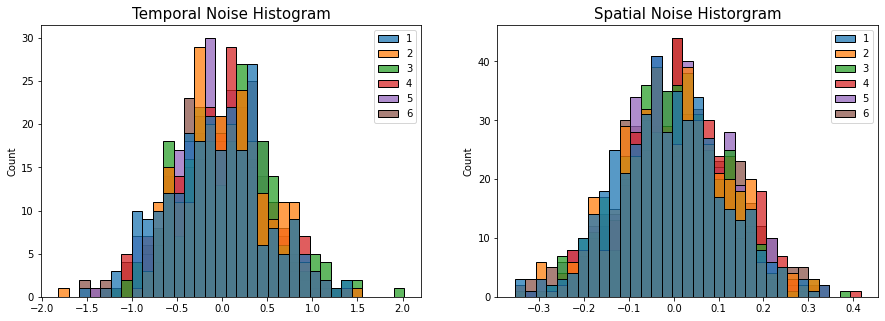

In [12]:
# Distribution of noise values

fig, axs = plt.subplots(1,2, figsize = (15,5))
sns.histplot(t_df, ax = axs[0])
axs[0].set_title("Temporal Noise Histogram", fontsize=15)
sns.histplot(s_df.T, ax = axs[1])
axs[1].set_title("Spatial Noise Historgram", fontsize=15)

plt.savefig("plots/1_4_temporal_and_spatial_noise_hist", bbox_inches="tight")

plt.show()

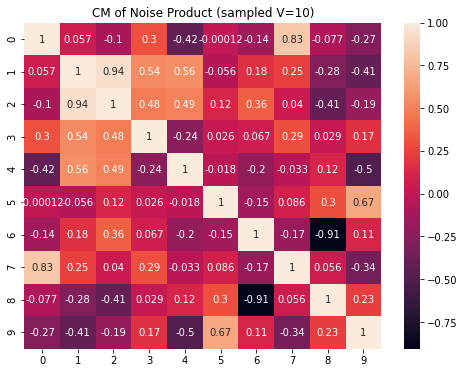

In [13]:
# number of first V samples out of 441 spatial variables (V)
sample_V = 10 

noise_product = np.dot(noise_t, noise_s)

prod_df = pd.DataFrame(noise_product[:, :sample_V])

plt.figure(figsize=(8,6))
sns.heatmap(prod_df.corr(), annot=True)
plt.title("CM of Noise Product (sampled V=10)")

plt.savefig("plots/1_4_noise_product_CM", bbox_inches="tight")

plt.show()

## 1.5. Synthetic Dataset Generation

In [14]:
X = np.dot((TC + noise_t), (SM + noise_s))

X_df = pd.DataFrame(X)
X_df

,0,1,2,3,4,5,6,7,8,9,...,431,432,433,434,435,436,437,438,439,440
0,-0.034161,0.719790,0.351190,0.477405,0.553667,0.283633,-0.191593,0.409942,0.232018,0.138591,...,-0.114946,0.505682,0.695573,0.142891,-0.196419,0.098919,0.038605,0.081250,0.055200,0.631541
1,-0.306595,0.610868,0.367502,0.328933,0.644745,0.335372,-0.108714,0.103016,0.223035,0.280718,...,0.039863,0.477507,0.713319,0.434857,-0.436552,0.278914,0.351885,0.290599,0.036904,0.626980
2,-0.193497,0.739866,0.379697,0.478459,0.633275,0.255007,-0.201178,0.235244,0.255620,0.173000,...,-0.072115,0.429489,0.774261,0.206455,-0.305449,0.209124,0.207754,0.295440,0.059536,0.661644
3,-0.206389,0.460697,0.287557,0.567761,0.154974,0.252176,0.036381,0.072487,0.169399,0.410774,...,0.097143,0.595046,0.378841,0.245688,-0.268132,0.095827,0.113175,0.056419,0.185089,0.351103
4,-0.334288,0.034625,0.021114,0.009822,0.403065,0.139736,-0.138607,-0.052514,0.209097,0.196255,...,-0.082680,0.243571,0.264057,0.439868,-0.289748,0.306611,0.342327,0.121136,0.096422,0.393222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,0.104696,0.078705,0.019870,-0.311817,0.254738,-0.084781,-0.049961,0.054629,-0.096923,-0.337847,...,-0.052909,-0.368200,0.131682,-0.138240,0.064331,0.035929,0.023382,0.146038,-0.196462,0.063050
236,0.212602,0.293718,0.134003,-0.321875,0.244868,-0.250589,0.183412,0.073832,-0.303017,-0.579310,...,0.021773,-0.602008,0.164793,-0.450618,0.208737,0.043757,-0.083567,0.164447,-0.237301,0.125170
237,0.154971,-0.205308,-0.186127,-0.542069,0.137507,-0.320423,-0.286300,-0.138607,-0.085907,-0.587873,...,-0.172890,-0.887192,-0.037130,-0.391906,0.206838,-0.041022,0.024363,0.421492,-0.312432,-0.276370
238,-0.065211,0.287539,0.245268,-0.475867,0.424181,-0.063971,0.382812,-0.154076,-0.348157,-0.353720,...,0.260436,-0.441098,0.258159,-0.004473,-0.116576,0.252361,0.253636,0.259641,-0.265341,0.244003


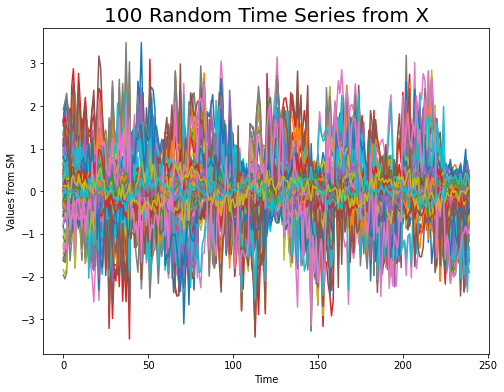

In [15]:
# plot random 100 time series from X

N_SAMPLE = 100 # out of 441 spatial variables
X_df_sample = X_df.T.sample(n=N_SAMPLE)

fig, ax = plt.subplots(figsize=(8,6))

for i in range(0,N_SAMPLE):
    ax.plot(X_df_sample.iloc[i,:])

plt.title("100 Random Time Series from X", fontsize=20)
plt.xlabel("Time")
plt.ylabel("Values from SM")

plt.savefig("plots/1_5_100_random_time_series", bbox_inches="tight")

plt.show()

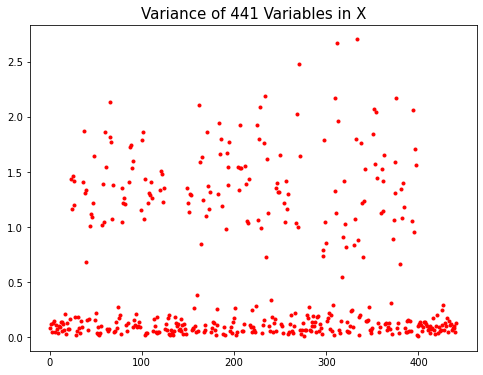

In [16]:
# Variance Distribution

plt.figure(figsize=(8,6))
plt.scatter(range(1,442), np.var(X, axis=0), color="red", marker=".")
plt.title("Variance of 441 Variables in X", fontsize=15)
plt.savefig("plots/1_5_variance_distribution", bbox_inches="tight")
plt.show()

In [17]:
# Standardize X per column (axis=0)
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,431,432,433,434,435,436,437,438,439,440
0,-0.123312,2.020748,1.562221,1.314136,1.458605,1.271146,-0.570259,1.572476,1.251443,0.425574,...,-0.572040,1.345268,2.042666,0.425776,-0.749171,0.368273,0.121136,0.183295,0.319998,1.758737
1,-1.061312,1.707229,1.637752,0.901442,1.699039,1.506883,-0.325032,0.420070,1.203963,0.861808,...,0.116480,1.271590,2.095789,1.259690,-1.700395,0.993710,1.221661,0.849506,0.232296,1.746261
2,-0.671912,2.078534,1.694219,1.317065,1.668760,1.140723,-0.598622,0.916543,1.376195,0.531187,...,-0.381549,1.146021,2.278226,0.607327,-1.181063,0.751206,0.715342,0.864913,0.340782,1.841070
3,-0.716297,1.274979,1.267582,1.565291,0.406115,1.127824,0.104285,0.305443,0.920463,1.260986,...,0.371237,1.578959,1.094502,0.719384,-1.033243,0.357530,0.383093,0.104277,0.942605,0.991697
4,-1.156659,0.048576,0.033863,0.014437,1.061038,0.615522,-0.413483,-0.163894,1.130294,0.602563,...,-0.428537,0.659841,0.750884,1.274003,-1.118869,1.089948,1.188086,0.310226,0.517590,1.106900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,0.354778,0.175455,0.028102,-0.879595,0.669479,-0.407426,-0.151190,0.238392,-0.487214,-1.036757,...,-0.296130,-0.939956,0.354608,-0.377189,0.283724,0.149400,0.067659,0.389471,-0.886315,0.203832
236,0.726306,0.794347,0.556577,-0.907553,0.643423,-1.162885,0.539328,0.310494,-1.576547,-1.777882,...,0.036027,-1.551371,0.453729,-1.269405,0.855750,0.176601,-0.308043,0.448055,-1.082070,0.373740
237,0.527878,-0.642044,-0.925729,-1.519605,0.360005,-1.481063,-0.850485,-0.487143,-0.428987,-1.804162,...,-0.829751,-2.297133,-0.150744,-1.101712,0.848226,-0.117981,0.071104,1.266049,-1.442202,-0.724529
238,-0.230218,0.776562,1.071771,-1.335589,1.116782,-0.312611,1.129329,-0.545224,-1.815140,-1.085476,...,1.097492,-1.130586,0.733228,0.004875,-0.432892,0.901444,0.876522,0.750988,-1.216478,0.698764


In [18]:
X.shape

(240, 441)

# Question 2: Data Analysis, Results Visualization, Performance Metrics

## 2.1. Least Square Regression (LSR)

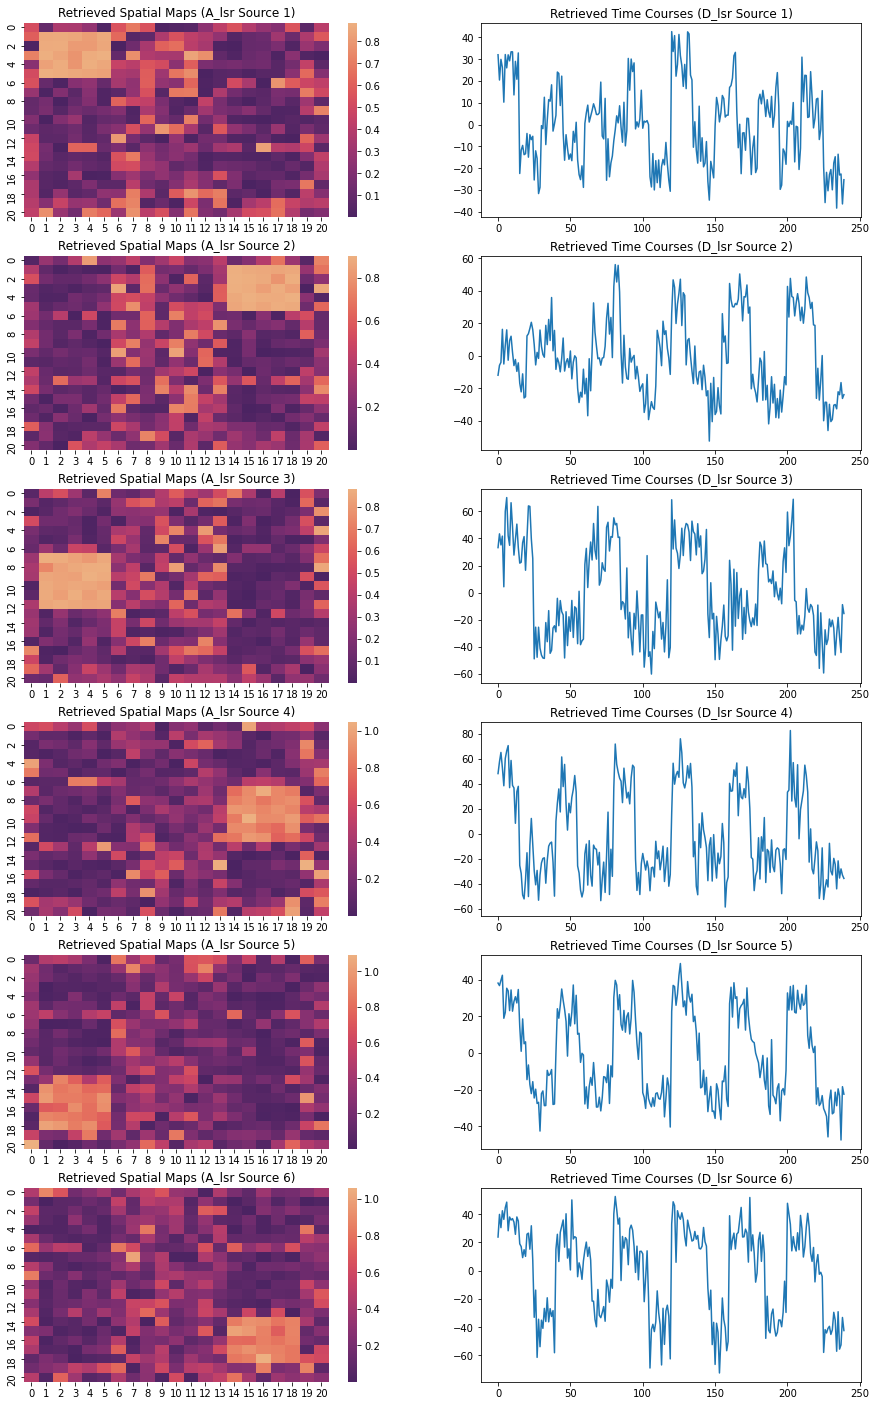

In [19]:
TC_t = TC.transpose()
DtD_inv = np.linalg.inv(np.dot(TC_t, TC))
DtX = np.dot(TC_t, X)

# A least square estimate
A_lsr = abs(np.dot(DtD_inv, DtX))

# D least square estimate
D_lsr = np.dot(X, A_lsr.transpose())

fig, axs = plt.subplots(6,2,figsize=(15,25))

for i in range(0,6):
    sns.heatmap(A_lsr.reshape(6,21,21)[i,:], cmap="flare_r", ax=axs[i,0])
    axs[i,0].set_title(f"Retrieved Spatial Maps (A_lsr Source {i+1})")
    axs[i,1].plot(D_lsr[:,i])
    axs[i,1].set_title(f"Retrieved Time Courses (D_lsr Source {i+1})")

plt.savefig("plots/2_1_Alsr_Dlsr", bbox_inches="tight")

plt.show()

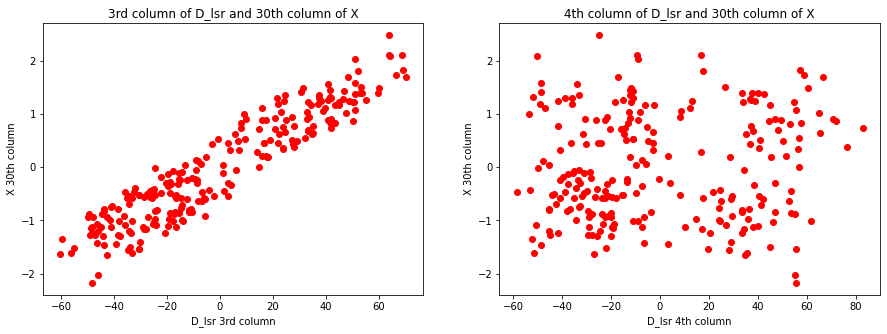

In [20]:
# Scatter plot of 3rd column of Dlsr and 30th column of standardized X

fig, axs = plt.subplots(1,2,figsize=(15,5))

ix = math.ceil(V/NSRCS)

axs[0].scatter(D_lsr[:,2],  X[:,ix*2], color="red")
axs[0].set_title("3rd column of D_lsr and 30th column of X")
axs[0].set_xlabel("D_lsr 3rd column")
axs[0].set_ylabel("X 30th column")

axs[1].scatter(D_lsr[:,3],  X[:,ix*2], color="red")
axs[1].set_title("4th column of D_lsr and 30th column of X")
axs[1].set_xlabel("D_lsr 4th column")
axs[1].set_ylabel("X 30th column")

plt.savefig("plots/2_1_Dlsr_vs_X_linear", bbox_inches="tight")

plt.show()

## 2.2. Ridge Regression (RR)

In [21]:
lmbda = 0.2 # Select value between 0 and 1

DtD = np.dot(TC_t, TC)
DtD_lambdai_inv = np.linalg.inv(DtD + lmbda*V*np.identity(6))

# A estimates using RR
A_rr = abs(np.dot(DtD_lambdai_inv, DtX))

# D estimates using RR
D_rr = np.dot(X, A_rr.transpose())

In [22]:
# C_tlsr: correlation vector between TC and D_lsr
c_tlsr = []

for tc_i in range(0,6):
    corr_list = []
    for d_i in range(0,6):
        corr = abs(np.corrcoef(TC[:,tc_i], D_lsr[:,d_i])[1,0])
        corr_list.append(corr)
    c_tlsr.append(max(corr_list))

# C_trr: correlation vector between TC and D_rr
c_trr = []
for tc_i in range(0,6):
    corr_list = []
    for d_i in range(0,6):
        corr = abs(np.corrcoef(TC[:,tc_i], D_rr[:,d_i])[1,0])
        corr_list.append(corr)
    c_trr.append(max(corr_list))
    
print(f"""

Correlation Vector between TC and D_lsr
c_tlsr = {c_tlsr}
Sum of c_tlsr = {sum(c_tlsr)}

Correlation Vector between TC and D_rr
c_trr = {c_trr}
Sum of c_trr = {sum(c_trr)}

""")



Correlation Vector between TC and D_lsr
c_tlsr = [0.768966477548226, 0.7765175930943867, 0.847807772427148, 0.8891160218704824, 0.8942447298432019, 0.8850693423700485]
Sum of c_tlsr = 5.061721937153493

Correlation Vector between TC and D_rr
c_trr = [0.7700344220360344, 0.7741357952352182, 0.847579321296557, 0.9134178375285964, 0.8853721069867683, 0.8802643283482977]
Sum of c_trr = 5.070803811431472




In [23]:
lmbda = 1000

DtD_lambdai_inv_1000 = np.linalg.inv(DtD + lmbda*V*np.identity(6))

# A estimates using RR
A_rr_1000 = abs(np.dot(DtD_lambdai_inv_1000, DtX))

# D estimates using RR
D_rr_1000 = np.dot(X, A_rr_1000.transpose())

<Figure size 720x360 with 0 Axes>

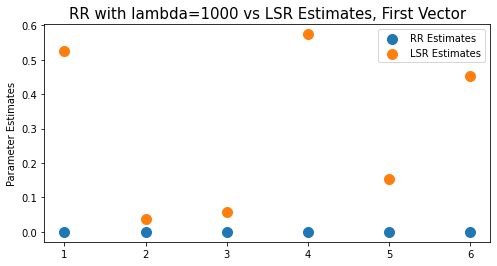

In [24]:
plt.figure(figsize=(10,5))

fig, ax = plt.subplots(figsize=(8,4))

ax.scatter(range(1,7), A_rr_1000[:,0], s=100, label="RR Estimates")
ax.scatter(range(1,7), A_lsr[:,0], s=100, label="LSR Estimates")
ax.legend()
plt.ylabel("Parameter Estimates")
plt.title("RR with lambda=1000 vs LSR Estimates, First Vector", fontsize=15)

plt.savefig("plots/2_2_rr1000_vs_lsr", bbox_inches="tight")

plt.show()

## 2.3. Finding ρ for Lasso Regression (LR)

In [25]:
# penalty / regularization term for lasso
rho_list = np.arange(0,1.05,0.05)

# translating the given R code
step = 1/(np.linalg.norm(np.dot(TC, TC_t) * 1.1))

MSE_per_rho = []

for rho in rho_list:
    
    MSE_10_obsvs = []
    
    for obs in range(0,10):
        
        # different noise (therefore different X) for every observation
        noise_t = np.random.normal(0, sd_t, size=(240,6))
        noise_s = np.random.normal(0, sd_s, size=(6,441))
        X_i = preprocessing.scale(np.dot((TC + noise_t), (SM + noise_s)))
        
        thr = rho*N*step
        Ao = np.zeros(shape=(NSRCS,1))
        A = np.zeros(shape=(NSRCS,1))
        Alr = np.zeros(shape=(NSRCS, x1*x2))
            
        for k in range(0,x1*x2):
            vv = (X_i[:,k].reshape(N,) - np.dot(TC, Ao).reshape(N,))
            A = Ao.reshape(NSRCS,) + step*(np.dot(TC_t, vv).reshape(NSRCS,))
            A = (1/(1+thr)) * np.sign(A) * np.maximum(np.repeat(0, NSRCS), abs(A) - thr)
            for i in range(0,10):
                Ao = A
                A = Ao + step*(np.dot(TC_t, X_i[:,k] - np.dot(TC, Ao)))
                A = (1/(1+thr)) * np.sign(A) * np.maximum(np.repeat(0, NSRCS), abs(A) - thr)
            Alr[:,k] = A
        Dlr = np.dot(X_i, Alr.transpose())
        MSE = sum(sum((X_i - np.dot(Dlr, Alr))**2)) / (N*V)
        MSE_10_obsvs.append(MSE)
        
    MSE_per_rho.append(sum(MSE_10_obsvs) / len(MSE_10_obsvs))
            

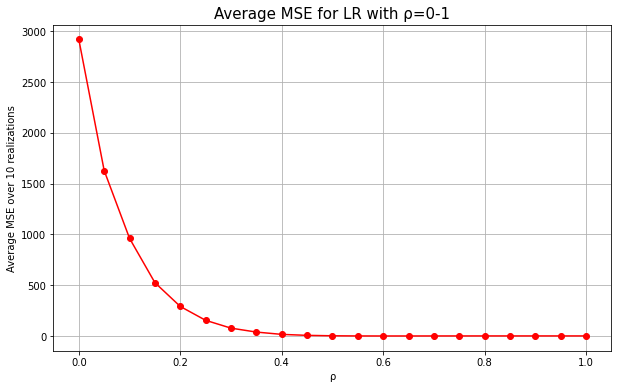

In [26]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(rho_list, MSE_per_rho, color="red", marker="o")
plt.title("Average MSE for LR with ρ=0-1", fontsize=15)
plt.xlabel("ρ")
plt.ylabel("Average MSE over 10 realizations")
plt.grid()

plt.savefig("plots/2_3_MSE_vs_rho_LR", bbox_inches="tight")

plt.show()

In [27]:
print(f"""

Average MSE is minimum ({min(MSE_per_rho)}) when ρ = {rho_list[np.argmin(MSE_per_rho)]:.2f}

""")



Average MSE is minimum (0.45751568105719276) when ρ = 0.60




## 2.4. LASSO Regression (LR) Estimation

In [28]:
# rho = 0.6 as of result from 2.3
rho = 0.6

step = 1/(np.linalg.norm(np.dot(TC, TC_t) * 1.1))
thr = rho*N*step
Ao = np.zeros(shape=(NSRCS,1))
A = np.zeros(shape=(NSRCS,1))
Alr = np.zeros(shape=(NSRCS, x1*x2))

for k in range(0,x1*x2):
    vv = (X[:,k].reshape(N,) - np.dot(TC, Ao).reshape(N,))
    A = Ao.reshape(NSRCS,) + step*(np.dot(TC_t, vv).reshape(NSRCS,))
    A = (1/(1+thr)) * np.sign(A) * np.maximum(np.repeat(0, NSRCS), abs(A) - thr)
    for i in range(0,10):
        Ao = A
        A = Ao + step*(np.dot(TC_t, X[:,k] - np.dot(TC, Ao)))
        A = (1/(1+thr)) * np.sign(A) * np.maximum(np.repeat(0, NSRCS), abs(A) - thr)
    Alr[:,k] = A
    
Alr = abs(Alr)
Dlr = np.dot(X, Alr.transpose())

### Correlation Vector: LR vs RR

In [29]:
# (i) C_tlsr: correlation vector between TC and D_rr
c_trr = []

for i in range(0,6):
    corr_list = []
    for j in range(0,6):
        corr = abs(np.corrcoef(TC[:,i], D_rr[:,j])[1,0])
        corr_list.append(corr)
    c_trr.append(max(corr_list))

# (ii) C_srr: correlation vector between SM and A_rr
c_srr = []
for i in range(0,6):
    corr_list = []
    for j in range(0,6):
        corr = abs(np.corrcoef(SM[i,:], A_rr[j,:])[1,0])
        corr_list.append(corr)
    c_srr.append(max(corr_list))
    
# (iii) C_tlr: correlation vector between TC and D_lr
c_tlr = []

for i in range(0,6):
    corr_list = []
    for j in range(0,6):
        corr = abs(np.corrcoef(TC[:,i], Dlr[:,j])[1,0])
        corr_list.append(corr)
    c_tlr.append(max(corr_list))

# (iv) C_trr: correlation vector between SM and A_lr
c_slr= []
for i in range(0,6):
    corr_list = []
    for j in range(0,6):
        corr = abs(np.corrcoef(SM[i,:], Alr[j,:])[1,0])
        corr_list.append(corr)
    c_slr.append(max(corr_list))
    
print(f"""

(i) Correlation Vector between TC and D_rr
c_trr = {c_trr}
Sum of c_trr = {sum(c_trr)}

(ii) Correlation Vector between SM and A_rr
c_srr = {c_srr}
Sum of c_srr = {sum(c_srr)}

(iii) Correlation Vector between TC and D_lr
c_tlr = {c_tlr}
Sum of c_tlr = {sum(c_tlr)}

(iv) Correlation Vector between SM and A_lr
c_slr = {c_slr}
Sum of c_slr = {sum(c_slr)}

===================================

sum(c_tlr): {sum(c_tlr)}    >    sum(c_trr): {sum(c_trr)}
sum(c_slr): {sum(c_slr)}    >    sum(c_srr): {sum(c_srr)}

""")



(i) Correlation Vector between TC and D_rr
c_trr = [0.7700344220360344, 0.7741357952352182, 0.847579321296557, 0.9134178375285964, 0.8853721069867683, 0.8802643283482977]
Sum of c_trr = 5.070803811431472

(ii) Correlation Vector between SM and A_rr
c_srr = [0.5496277355286115, 0.5769846642681355, 0.6199181847909212, 0.6028053485980495, 0.599095694089801, 0.5811655730447105]
Sum of c_srr = 3.5295972003202287

(iii) Correlation Vector between TC and D_lr
c_tlr = [0.878260340675357, 0.897685515141408, 0.8673621453177598, 0.9122135023428125, 0.9143097770013996, 0.9098138890295694]
Sum of c_tlr = 5.379645169508307

(iv) Correlation Vector between SM and A_lr
c_slr = [0.8429287296502073, 0.8421523083350385, 0.8480771857760774, 0.8353801739581002, 0.820297114537954, 0.7925484471472503]
Sum of c_slr = 4.981383959404628


sum(c_tlr): 5.379645169508307    >    sum(c_trr): 5.070803811431472
sum(c_slr): 4.981383959404628    >    sum(c_srr): 3.5295972003202287




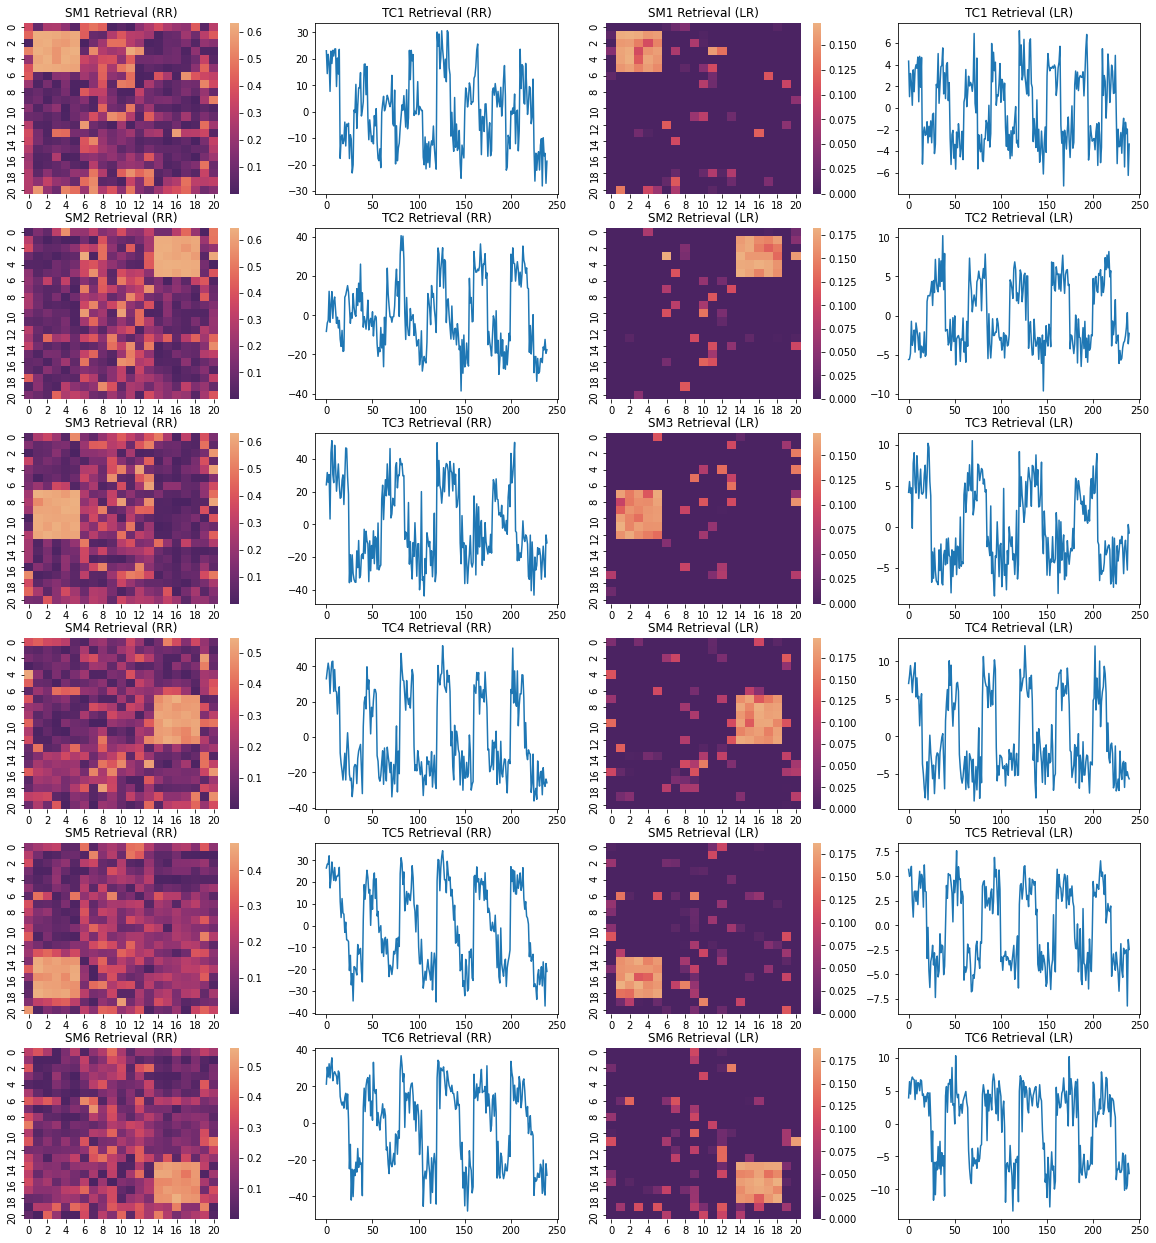

In [30]:
fig, axs = plt.subplots(6,4, figsize=(20,22))
    
for i in range(0,6):
    
    # A, rr
    sns.heatmap(A_rr.reshape(6,21,21)[i,:], cmap="flare_r", ax=axs[i,0])
    axs[i,0].set_title(f"SM{i+1} Retrieval (RR)")
    
    # D, rr
    axs[i,1].plot(D_rr[:,i])
    axs[i,1].set_title(f"TC{i+1} Retrieval (RR)")
    
    # A, lr
    sns.heatmap(Alr.reshape(6,21,21)[i,:], cmap="flare_r", ax=axs[i,2])
    axs[i,2].set_title(f"SM{i+1} Retrieval (LR)")
    
    # D, lr
    axs[i,3].plot(Dlr[:,i])
    axs[i,3].set_title(f"TC{i+1} Retrieval (LR)")
    
plt.savefig("plots/2_4_RR_vs_LR_all", bbox_inches="tight")

plt.show()

## 2.5. Principal Component (PC) Regression

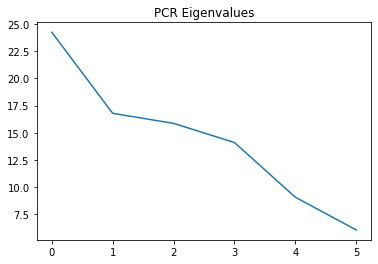

In [31]:
Z, s, vh = np.linalg.svd(TC, full_matrices=False)

# Z has dimension 240x6

fig, ax = plt.subplots()
ax.plot(s)
plt.title("PCR Eigenvalues")

plt.savefig("plots/2_5_eigenvalues_min", bbox_inches="tight")

plt.show()

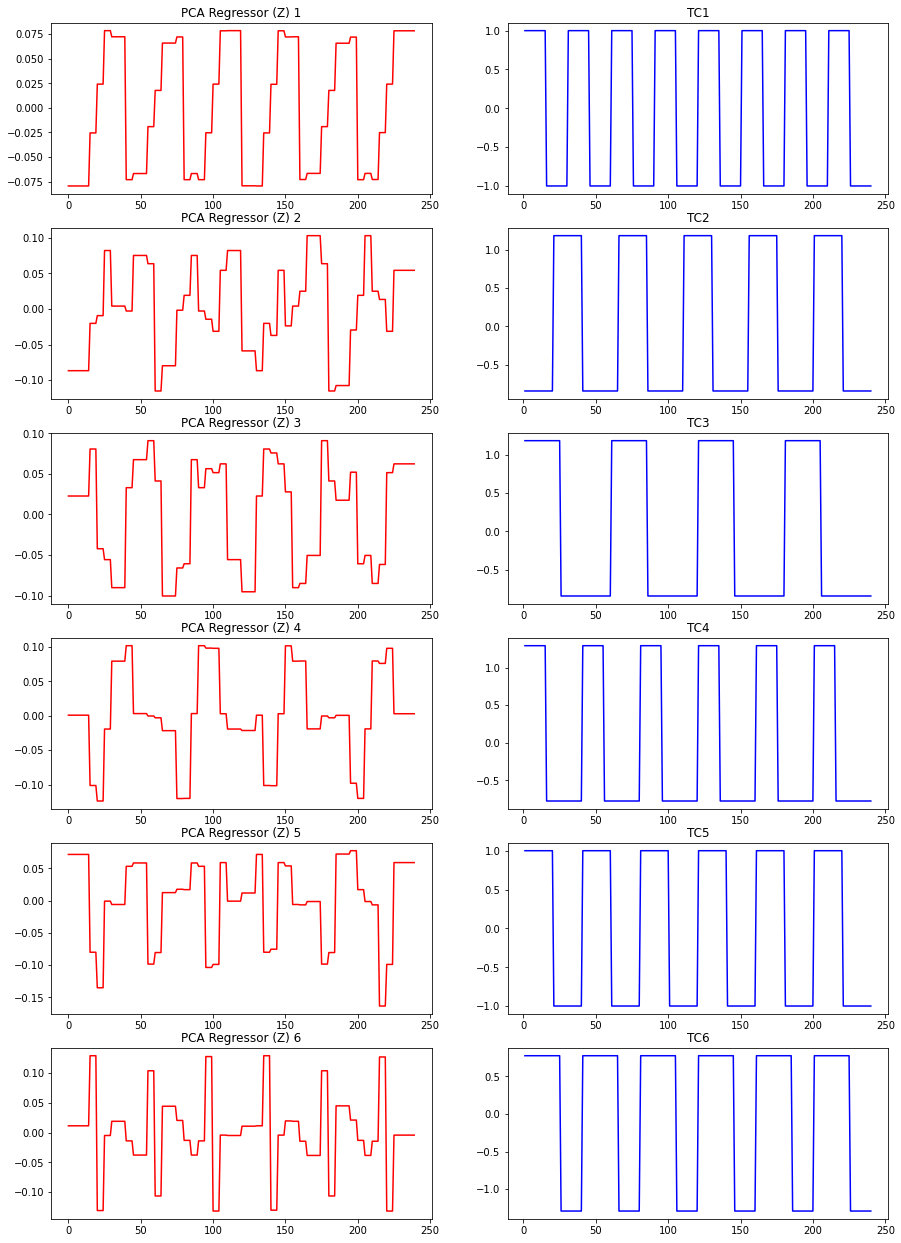

In [32]:
fig, axs = plt.subplots(6,2,figsize=(15,22))

for i in range(0,6):
    axs[i,0].plot(Z[:,i], color="red")
    axs[i,0].set_title(f"PCA Regressor (Z) {i+1}")
    axs[i,1].plot(range(1,241), TC[:,i], color="blue")
    axs[i,1].set_title(f"TC{i+1}")

plt.savefig("plots/2_5_PCAreg_vs_TC", bbox_inches="tight")

plt.show()

In [33]:
# rho = 0.001 as stated in paper.
rho = 0.001

# use Z as regressor, instead of TC
Z_t = Z.transpose()

step = 1/(np.linalg.norm(np.dot(Z, Z_t) * 1.1))
thr = rho*N*step
Ao = np.zeros(shape=(NSRCS,1))
A = np.zeros(shape=(NSRCS,1))
A_pcr = np.zeros(shape=(NSRCS, x1*x2))

for k in range(0,x1*x2):
    vv = (X[:,k].reshape(N,) - np.dot(Z, Ao).reshape(N,))
    A = Ao.reshape(NSRCS,) + step*(np.dot(Z_t, vv).reshape(NSRCS,))
    A = (1/(1+thr)) * np.sign(A) * np.maximum(np.repeat(0, NSRCS), abs(A) - thr)
    for i in range(0,10):
        Ao = A
        A = Ao + step*(np.dot(Z_t, X[:,k] - np.dot(Z, Ao)))
        A = (1/(1+thr)) * np.sign(A) * np.maximum(np.repeat(0, NSRCS), abs(A) - thr)
    A_pcr[:,k] = A
    
A_pcr = abs(A_pcr)
D_pcr = np.dot(X, A_pcr.T)

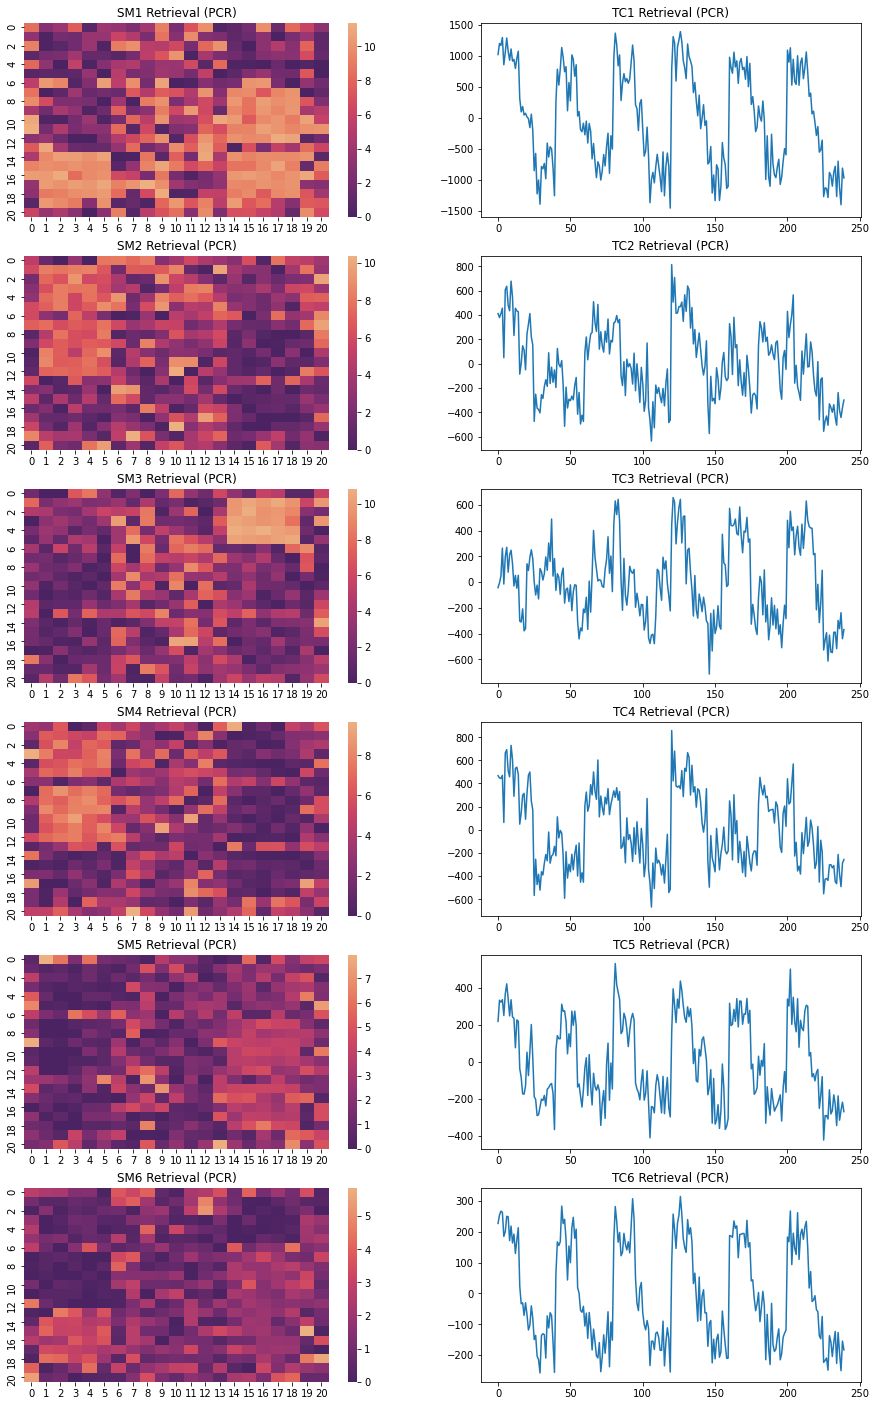

In [34]:
fig, axs = plt.subplots(6,2, figsize=(15,25))
    
for i in range(0,6):
    
    # A, pcr
    sns.heatmap(A_pcr.reshape(6,21,21)[i,:], cmap="flare_r", ax=axs[i,0])
    axs[i,0].set_title(f"SM{i+1} Retrieval (PCR)")
    
    # D, rr
    axs[i,1].plot(D_pcr[:,i])
    axs[i,1].set_title(f"TC{i+1} Retrieval (PCR)")
    
plt.savefig("plots/2_5_PCR_retrievals", bbox_inches="tight")

plt.show()